In [18]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn.naive_bayes import BaseNB, GaussianNB
import pandas as pd

In [9]:
mean_1 = [0.0, 0.0]
mean_2 = [3.0, 4.0]
cov_1 = [[0.9, 0.4], [0.3, 0.7]]
cov_2 = [[1.0, 0.1], [0.5, 0.6]]

d1 = np.random.multivariate_normal(mean_1, cov_1, 300)
d2 = np.random.multivariate_normal(mean_2, cov_2, 300)

print d1.shape, d2.shape

(300, 2) (300, 2)


In [10]:
d = np.zeros((d1.shape[0] + d2.shape[0], d1.shape[1]+1))
d[:d1.shape[0], :2] = d1
d[d1.shape[0]:, :2] = d2
d[d1.shape[0]:, 2] = 1
print d.shape
np.random.shuffle(d)
print d[150:160, 2]

(600, 3)
[ 1.  1.  1.  0.  0.  0.  1.  0.  0.  1.]


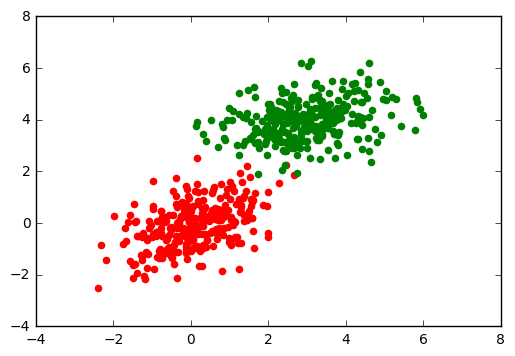

In [13]:
plt.figure(0)
plt.scatter(d1[:, 0], d1[:, 1], color='red')
plt.scatter(d2[:, 0], d2[:, 1], color='green')
plt.show()

In [11]:
split = int(0.75 * d.shape[0])
X_train = d[:split, :2]
X_test = d[split:, :2]
y_train = d[:split, 2]
y_test = d[split:, 2]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(450, 2) (150, 2)
(450,) (150,)


In [16]:
import datetime
nb = GaussianNB()
start = datetime.datetime.now()
nb.fit(X_train, y_train)
end = datetime.datetime.now()
print end-start

print "Accuracy:", 100*nb.score(X_test, y_test)

0:00:00
Accuracy: 99.3333333333


In [29]:
ds = pd.read_csv('./Machine Learning Bootcamp/mnist_data/train.csv')
data = ds.values[:10000]
print data.shape

(10000, 785)


In [30]:
X = data[:, 1:]
print X.shape

Z = (X-X.mean())/X.std()

print X.mean(), Z.mean()
print X.std(), Z.std()

(10000, 784)
33.5456364796 -8.64723258984e-17
78.8147108194 1.0


In [34]:
split = int(0.8 * Z.shape[0])
X_train = Z[:split]
X_test = Z[split:]
y_train = data[:split, 0]
y_test = data[split:, 0]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(8000, 784) (2000, 784)
(8000,) (2000,)


In [36]:
nb = GaussianNB()
nb.fit(X_train, y_train)

print nb.score(X_test, y_test)

0.5505
